# The Economic Guide To Picking A College Major

![alt text](https://www.rappahannockunitedway.org/wp-content/uploads/2017/11/graduation-caps.jpg "Logo Title Text 1")



### Introduction

The millions of American college students face a grim reality: A college degree is no guarantee of economic success. But through their choice of major, they can take at least some steps toward boosting their odds.

The link between education and earnings is notoriously fraught, with cause and effect often difficult to disentangle. But a look at detailed data on college graduates by major reveals some clear messages: Don’t assume that all “STEM” — science, technology, engineering and math — majors are the same; and if you study drama, be prepared to wait tables.


Below is a deeper dive into the trends in the data.

### Setting up the dataset and libraries

In [500]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

raw_recent_grads = pd.read_csv("recent-grads.csv")

### Checking & organizing & cleaning data 

In [472]:
raw_recent_grads.head(2)

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [473]:
raw_recent_grads.tail(2)

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
171,172,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,4626,21,931,3695,0.798746,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,Education,1098,2,134,964,0.877960,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [474]:
raw_recent_grads.describe(include="all")

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,173,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ARCHITECTURE,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,NaN,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,NaN,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,...,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,NaN,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,NaN,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,...,1030.000000,2453.000000,304.000000,0.050723,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,NaN,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,...,3299.000000,7413.000000,893.000000,0.068272,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,NaN,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087599,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [475]:
raw_recent_grads.shape

(173, 21)

In [476]:
recent_grads = raw_recent_grads.dropna()
recent_grads.describe(include="all")

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172,172,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ARCHITECTURE,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.075581,3880.273256,NaN,NaN,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,...,8883.750000,19808.284884,2430.377907,0.068587,40152.325581,29440.406977,51561.046512,12394.279070,13361.732558,3881.453488
std,50.221266,1692.670105,NaN,NaN,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,...,14675.322609,33223.830918,4120.646319,0.029967,11503.665592,9157.437674,14923.788658,21341.142889,23837.351017,6958.985234
min,1.000000,1100.000000,NaN,NaN,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,...,0.000000,340.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,162.000000,50.000000,0.000000
25%,43.750000,2402.750000,NaN,NaN,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,...,1037.500000,2474.750000,307.000000,0.050723,33000.000000,24000.000000,42000.000000,1744.750000,1594.000000,342.250000
50%,87.500000,3607.500000,NaN,NaN,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,...,3332.500000,7436.500000,905.000000,0.068272,36000.000000,27000.000000,47050.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,NaN,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,...,9981.000000,17674.750000,2397.000000,0.087599,45000.000000,33000.000000,60000.000000,14595.750000,11791.750000,3496.000000


In [477]:
recent_grads.shape

(172, 21)

 Only one row contained missing values and was dropped.

In [478]:
recent_grads["Median"].describe()
recent_grads["Major_category"].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Agriculture & Natural Resources',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Humanities & Liberal Arts', 'Psychology & Social Work',
       'Communications & Journalism', 'Interdisciplinary'], dtype=object)

In [479]:
engr_majors = recent_grads[recent_grads["Major_category"] == "Engineering"]

nat_sci_majors = recent_grads[(recent_grads["Major_category"] == "Physical Sciences") | (recent_grads["Major_category"] == "Computers & Mathematics") | (recent_grads["Major_category"] == "Biology & Life Science")]

frames = [engr_majors, nat_sci_majors]
steam_majors = pd.concat(frames)
steam_majors = pd.concat(frames).sort_values(by=['Rank'])

non_steam_majors = recent_grads[(recent_grads["Major_category"] != "Physical Sciences") & (recent_grads["Major_category"] != "Computers & Mathematics") & (recent_grads["Major_category"] != "Biology & Life Science") & (recent_grads["Major_category"] != "Engineering")]

In [480]:
engr_majors["Major_category"].unique()

array(['Engineering'], dtype=object)

In [481]:
nat_sci_majors["Major_category"].unique()

array(['Physical Sciences', 'Computers & Mathematics',
       'Biology & Life Science'], dtype=object)

In [482]:
steam_majors["Major_category"].unique()

array(['Engineering', 'Physical Sciences', 'Computers & Mathematics',
       'Biology & Life Science'], dtype=object)

In [483]:
non_steam_majors["Major_category"].unique()

array(['Business', 'Law & Public Policy',
       'Agriculture & Natural Resources',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Education', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

### Data Analysis

#### STEAM vs. NON-STEAM

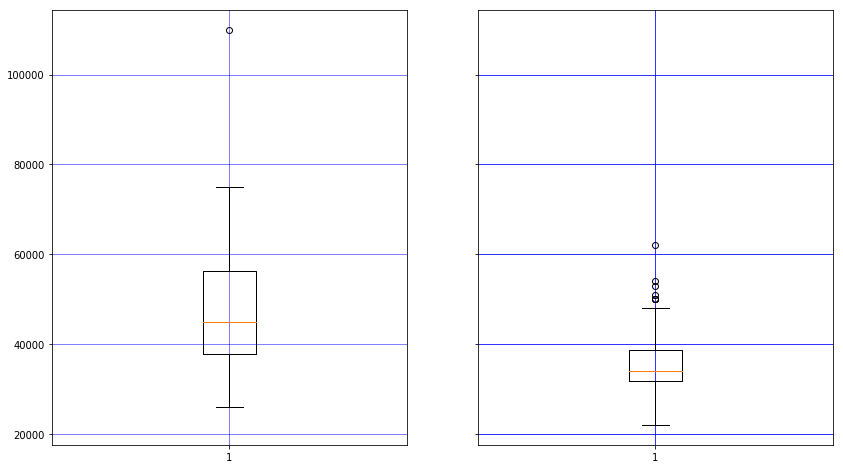

In [484]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,8),frameon=True)

ax1.boxplot(steam_majors["Median"].values)
ax1.grid(b=True, which='major', color='b', linestyle='-', linewidth=0.5)

ax2.boxplot(non_steam_majors["Median"].values)
ax2.grid(b=True, which='major', color='b', linestyle='-')

In [485]:
steam_majors["Median"].describe()

count        64.000000
mean      47860.937500
std       13478.337908
min       26000.000000
25%       37875.000000
50%       45000.000000
75%       56250.000000
max      110000.000000
Name: Median, dtype: float64

In [486]:
non_steam_majors["Median"].describe()

count      108.000000
mean     35584.259259
std       6922.483510
min      22000.000000
25%      31875.000000
50%      34000.000000
75%      38800.000000
max      62000.000000
Name: Median, dtype: float64

The dataset shows that STEAM majors — science, technology, engineering, and math — on average earn 47.860,00, while non-STEAM majors earn about 35.584,00. 

#### Are all STEAM majors the same? 

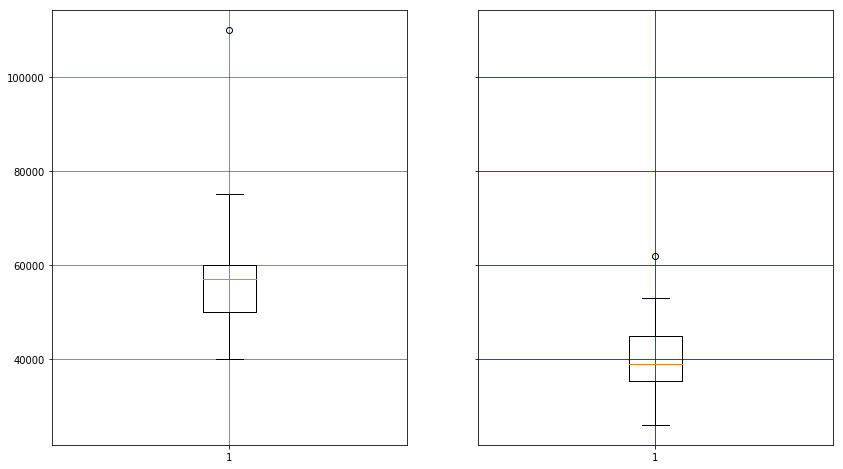

In [487]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,8),frameon=True)

ax1.boxplot(engr_majors["Median"].values)
ax1.grid(b=True, which='major', color='b', linestyle='-', linewidth=0.5)

ax2.boxplot(nat_sci_majors["Median"].values)
ax2.grid(b=True, which='major', color='b', linestyle='-')

In [488]:
engr_majors["Median"].describe()

count        29.000000
mean      57382.758621
std       13626.079747
min       40000.000000
25%       50000.000000
50%       57000.000000
75%       60000.000000
max      110000.000000
Name: Median, dtype: float64

In [489]:
nat_sci_majors["Median"].describe()

count       35.000000
mean     39971.428571
std       6504.142184
min      26000.000000
25%      35300.000000
50%      39000.000000
75%      45000.000000
max      62000.000000
Name: Median, dtype: float64

In [490]:
engr_majors["Median"].mean() - nat_sci_majors["Median"].mean()

17411.33004926108

Above shows that engineering majors pay on average about 17.411,00 more than non-engineering majors within STEAM. 

Lowest average earning of non-engineering majors within STEAM is 26.000,00, being below the average earnings of non-STEAM majors(35.584,00). **Thus, picking any STEAM majors does not mean earning a greater salary.**

In contrast, the lowest average earning of engineering majors is 40.000,00 which is above non-STEAM majors. 

#### Engineering majors

Within engineering majors, which ones are the best pick? 

In [491]:
median_engr_majors = engr_majors["Median"].values

Text(0.5,1,'Average earns by engineering majors')

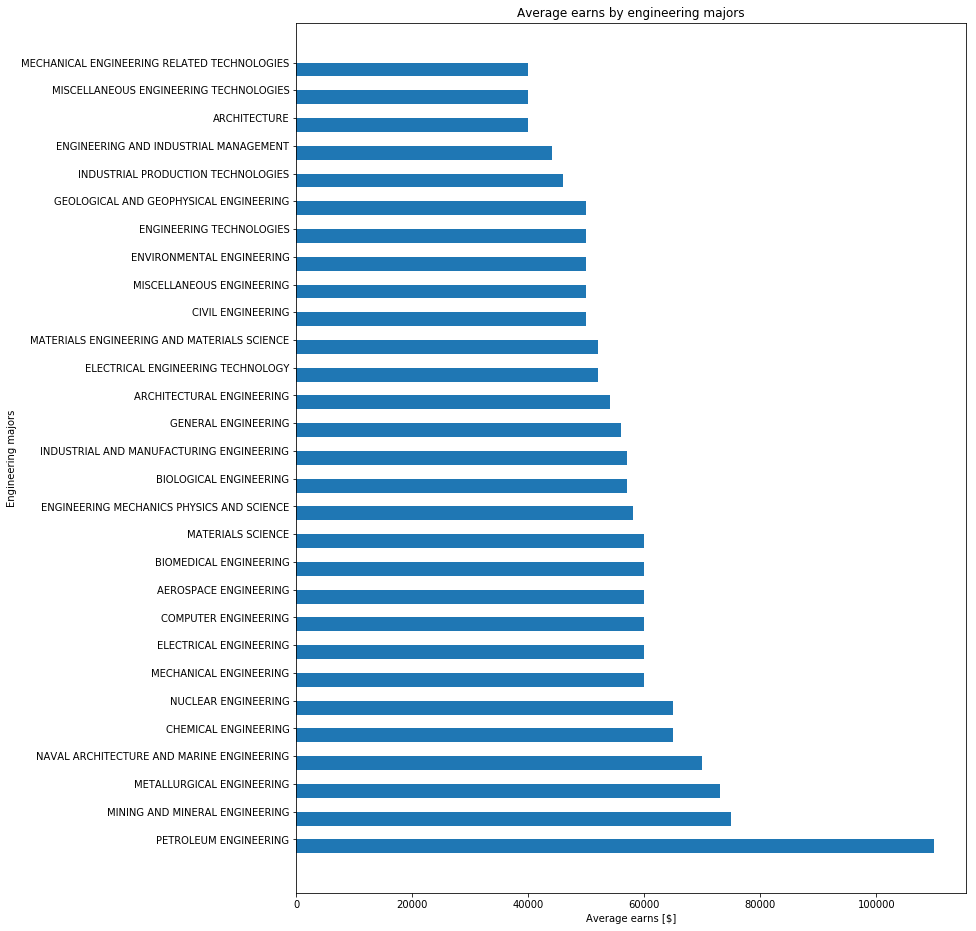

In [492]:
name_engr_majors = engr_majors["Major"].values
median_engr_majors = engr_majors["Median"].values

fig, ax = plt.subplots(figsize = (12,16))

bar_heights = median_engr_majors
bar_positions = arange(29) + 0.75
tick_positions = range(1,30)

ax.barh(bar_positions, bar_heights, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(name_engr_majors)
ax.set_ylabel("Engineering majors")
ax.set_xlabel("Average earns [$]")
ax.set_title("Average earns by engineering majors")

Within engineering majors, Petroleum engineering is a crazy outlier — its median salary is above 100.000,00.

In [493]:
engr_majors[["Rank","Major","Median"]]

,Rank,Major,Median
0,1,PETROLEUM ENGINEERING,110000
1,2,MINING AND MINERAL ENGINEERING,75000
2,3,METALLURGICAL ENGINEERING,73000
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,5,CHEMICAL ENGINEERING,65000
5,6,NUCLEAR ENGINEERING,65000
8,9,MECHANICAL ENGINEERING,60000
9,10,ELECTRICAL ENGINEERING,60000
10,11,COMPUTER ENGINEERING,60000
11,12,AEROSPACE ENGINEERING,60000


Nearly 50 percent higher than the runner-up, mining and mineral engineering. 

#### non-engineering STEAM majors

Text(0.5,1,'Average earnings by engineering majors')

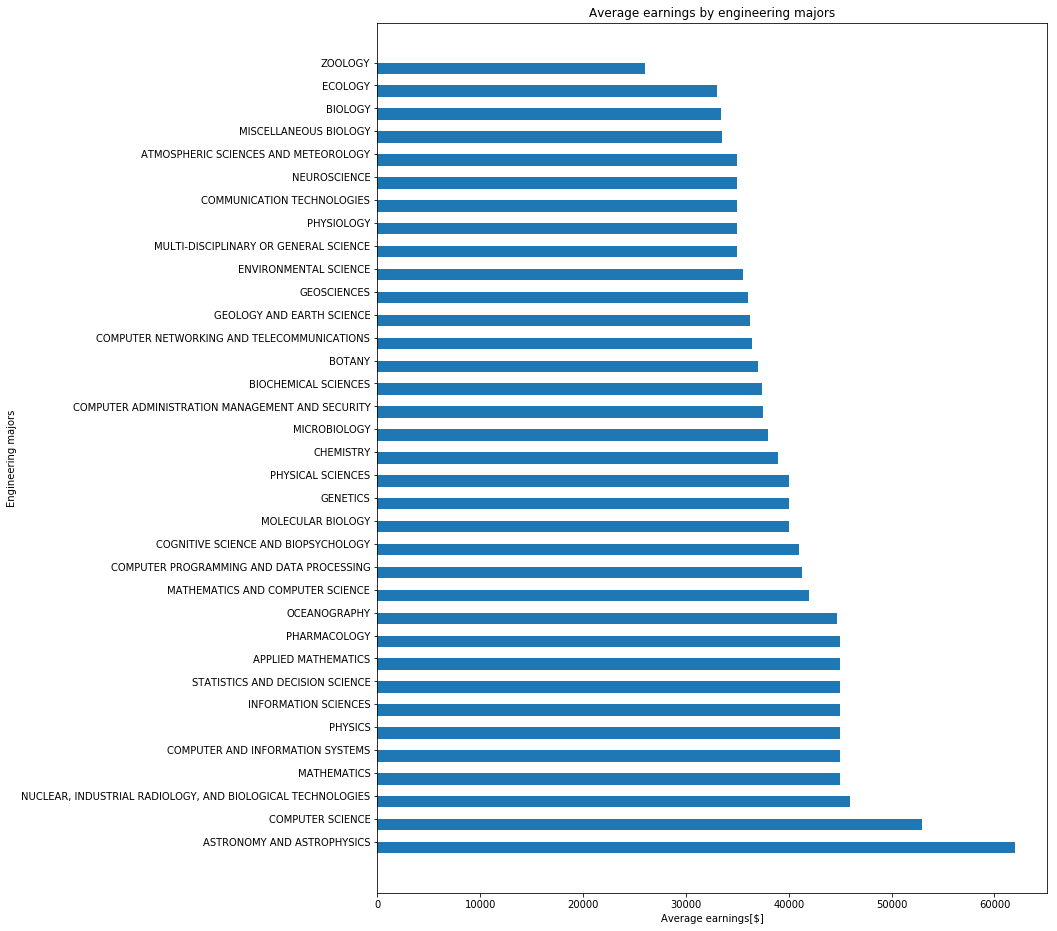

In [494]:
name_nat_sci_majors = nat_sci_majors["Major"].values
median_nat_sci_majors = nat_sci_majors["Median"].values

fig2, ax2 = plt.subplots(figsize = (12,16))

bar_positions = arange(35) + 0.75
tick_positions = range(1,36)

ax2.barh(bar_positions, median_nat_sci_majors, 0.5)

ax2.set_yticks(tick_positions)
ax2.set_yticklabels(name_nat_sci_majors)
ax2.set_ylabel("Engineering majors")
ax2.set_xlabel("Average earnings[$]")
ax2.set_title("Average earnings by engineering majors")

Within non-engineering STEAM majors, Astronomy and Astrophysics stand out from the crowd. 

In [495]:
nat_sci_majors[["Rank","Major","Median"]]

,Rank,Major,Median
7,8,ASTRONOMY AND ASTROPHYSICS,62000
20,21,COMPUTER SCIENCE,53000
39,40,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",46000
41,42,MATHEMATICS,45000
42,43,COMPUTER AND INFORMATION SYSTEMS,45000
43,44,PHYSICS,45000
45,46,INFORMATION SCIENCES,45000
46,47,STATISTICS AND DECISION SCIENCE,45000
47,48,APPLIED MATHEMATICS,45000
48,49,PHARMACOLOGY,45000


#### Avoiding unemployment

In [511]:
sorted_by_unrate = recent_grads.sort_values(by=['Unemployment_rate'], ascending=False)
sorted_by_unrate[["Rank","Major","Median","Unemployment_rate"]].head(10)

,Rank,Major,Median,Unemployment_rate
5,6,NUCLEAR ENGINEERING,65000,0.177226
89,90,PUBLIC ADMINISTRATION,36000,0.159491
84,85,COMPUTER NETWORKING AND TELECOMMUNICATIONS,36400,0.151850
170,171,CLINICAL PSYCHOLOGY,25000,0.149048
29,30,PUBLIC POLICY,50000,0.128426
105,106,COMMUNICATION TECHNOLOGIES,35000,0.119511
1,2,MINING AND MINERAL ENGINEERING,75000,0.117241
53,54,COMPUTER PROGRAMMING AND DATA PROCESSING,41300,0.113983
79,80,GEOGRAPHY,38000,0.113459
58,59,ARCHITECTURE,40000,0.113332


Even though Nuclear engineering has a high average earning, it has the highest unemployment rate with ~18%. 

In [513]:
sorted_by_unrate[["Rank","Major","Median","Unemployment_rate"]].tail(10)

,Rank,Major,Median,Unemployment_rate
7,8,ASTRONOMY AND ASTROPHYSICS,62000,0.021167
64,65,GENERAL AGRICULTURE,40000,0.019642
0,1,PETROLEUM ENGINEERING,110000,0.018381
119,120,MATHEMATICS TEACHER EDUCATION,34000,0.016203
19,20,COURT REPORTING,54000,0.011690
14,15,ENGINEERING MECHANICS PHYSICS AND SCIENCE,58000,0.006334
120,121,EDUCATIONAL ADMINISTRATION AND SUPERVISION,34000,0.000000
112,113,SOIL SCIENCE,35000,0.000000
52,53,MATHEMATICS AND COMPUTER SCIENCE,42000,0.000000
83,84,BOTANY,37000,0.000000


Teachers, for example, may not make much, but they generally find employment.

#### Is there a strong correlation between earnings and unemployment? 

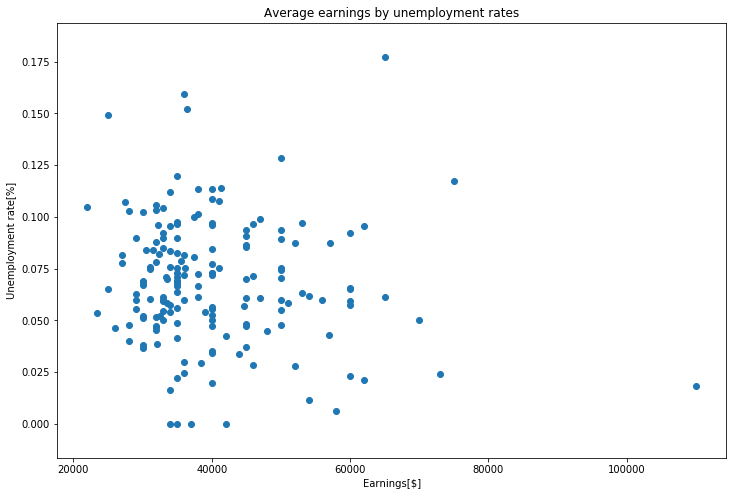

In [496]:
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.scatter(recent_grads['Median'], recent_grads['Unemployment_rate'])
ax3.set_xlabel('Earnings[$]')
ax3.set_ylabel('Unemployment rate[%]')
ax3.set_title("Average earnings by unemployment rates")
plt.show()

In [501]:
slope, intercept, r_value, p_value, std_err = stats.linregress(recent_grads['Median'], recent_grads['Unemployment_rate'])

In [502]:
print("r-squared:", r_value**2)

r-squared: 0.012244428070317918


**Weak** correlation likely reflects the fact that college graduates have a significant edge when it comes to finding jobs, regardless of what they major in. 

### Conclusion